# Projet Machine Learning

nous disposons d'un [dataset](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy) contenant 3649 observations et 21 variables , représentant diverses caractéristiques liées à la consommation énergétique et à la géographie de 176 pays du monde au cours des années 2000 à 2020.
le but de ce projet est de prévoir la quantité d'émission de carbonne produite par personne en tonne métrique en vu d'établir des stratégies de réduction des effets climatiques de l'Homme sur l'environnement .

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Data Cleaning

In [3]:
#we start by importing our dataset
df = pd.read_csv('/content/global-data-on-sustainable-energy.csv')
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [4]:
#we compute the percentage of missing values in our dataset for each variable
round((df.isna().sum()/len(df))*100,2)

Entity                                                               0.00
Year                                                                 0.00
Access to electricity (% of population)                              0.27
Access to clean fuels for cooking                                    4.63
Renewable-electricity-generating-capacity-per-capita                25.51
Financial flows to developing countries (US $)                      57.25
Renewable energy share in the total final energy consumption (%)     5.32
Electricity from fossil fuels (TWh)                                  0.58
Electricity from nuclear (TWh)                                       3.45
Electricity from renewables (TWh)                                    0.58
Low-carbon electricity (% electricity)                               1.15
Primary energy consumption per capita (kWh/person)                   0.00
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.67
Value_co2_emissions_kt_by_country     

we realize that we have a lot of missing values in our database so initially we will delete the variables with a high rate of missing values
such as <font color=blue>Financial flows to developing countries (US $)</font>
with <font color=red>57.25%</font> , <font color=blue>Renewable-electricity-generating-capacity-per-capita</font> with <font color=red>25.51%</font>
and <font color=blue>Renewables (% equivalent primary energy)</font> with <font color=red>58.56%</font> and for others variables
we will simply delete the lines where missing values appear

Secondly, we will investigate certain techniques for replacing missing values to replace the missing values of our Database

In [5]:
#let's drop the mentioned columns above
df.drop(columns = ['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)'],axis=1,inplace = True)

In [8]:
#now we drop the rows where NaN appears
df.dropna(inplace = True)
df.reset_index(drop = True,inplace=True)


In [9]:
#we compute the percentage of missing value again to check that everything is now alright
round((df.isna().sum()/len(df))*100,2)

Entity                                                              0.0
Year                                                                0.0
Access to electricity (% of population)                             0.0
Access to clean fuels for cooking                                   0.0
Renewable energy share in the total final energy consumption (%)    0.0
Electricity from fossil fuels (TWh)                                 0.0
Electricity from nuclear (TWh)                                      0.0
Electricity from renewables (TWh)                                   0.0
Low-carbon electricity (% electricity)                              0.0
Primary energy consumption per capita (kWh/person)                  0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.0
Value_co2_emissions_kt_by_country                                   0.0
gdp_growth                                                          0.0
gdp_per_capita                                                  

# Univariate Statistics

In [10]:
#we get some informations about our data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 18 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            2868 non-null   object 
 1   Year                                                              2868 non-null   int64  
 2   Access to electricity (% of population)                           2868 non-null   float64
 3   Access to clean fuels for cooking                                 2868 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  2868 non-null   float64
 5   Electricity from fossil fuels (TWh)                               2868 non-null   float64
 6   Electricity from nuclear (TWh)                                    2868 non-null   float64
 7   Electricity from renewables (TWh)

we can see that the variable <font color= blue>Density\n(P/Km2) </font> is of type object but it sould be a numerical variable
and the variable Entity is of type Object we'll convert it to categorical variable

we got an error when tried to access the variable <font color= blue>Density\n(P/Km2) </font> by typing
<font color= blue>df['Density\n(P/Km2)'] </font> so we'll use the regular expression to find it real name

In [11]:
#let's find the the name of the colunms Density\n(P/Km2)
density_column = df.columns[df.columns.str.contains(r'Density', flags=re.IGNORECASE)][0]
density_column

'Density\\n(P/Km2)'

In [12]:
#now we rename the variable Density\\n(P/Km2) and we change its type and the type of the variable Entity
df.rename(columns = {'Density\\n(P/Km2)':'Density'},inplace=True)
df['Entity'] = df['Entity'].astype('category')
df['Density'] = df['Density'].str.replace(',','.').astype('float')

In [13]:
#we get the statistics of our dataset
df.describe()

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
count,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000,2868.000000,2.868000e+03,2868.000000,2868.000000
mean,2009.607043,76.584630,62.170084,35.802071,76.693556,15.337019,26.603375,39.629403,26082.456843,5.418111,1.688182e+05,3.895326,12577.050921,123.410349,6.581668e+05,18.140402,12.970486
std,5.750605,31.510371,39.238548,30.024000,374.419806,78.776075,107.640273,34.454884,37097.457254,3.577415,8.180202e+05,4.645613,18730.476190,136.299227,1.705048e+06,24.924975,65.478645
min,2000.000000,1.252269,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,105.110120,1.030000,3.000000e+01,-36.658153,111.927225,1.265000,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,53.237811,22.075000,9.187500,0.290000,0.000000,0.090000,6.091074,2779.966525,3.280000,2.187500e+03,1.770575,1209.802655,25.000000,2.974300e+04,1.650801,-10.940835
50%,2010.000000,97.000000,81.550000,28.790000,2.995000,0.000000,1.680000,35.009718,11922.761000,4.400000,1.042500e+04,3.788166,4168.110171,76.000000,1.319570e+05,17.060816,18.643501
75%,2015.000000,100.000000,100.000000,60.667500,25.787500,0.000000,10.102500,66.879318,31838.556000,6.140000,5.814500e+04,5.957490,14828.344425,152.000000,4.881000e+05,39.399872,43.679291
max,2019.000000,100.000000,100.000000,96.040000,5098.220000,809.410000,2014.570000,100.000010,262585.700000,32.570000,1.070722e+07,63.379875,123514.196700,668.000000,9.984670e+06,64.963051,178.065032


In [14]:
#we take only numerical columns
df1 = df.select_dtypes(include = [np.number])

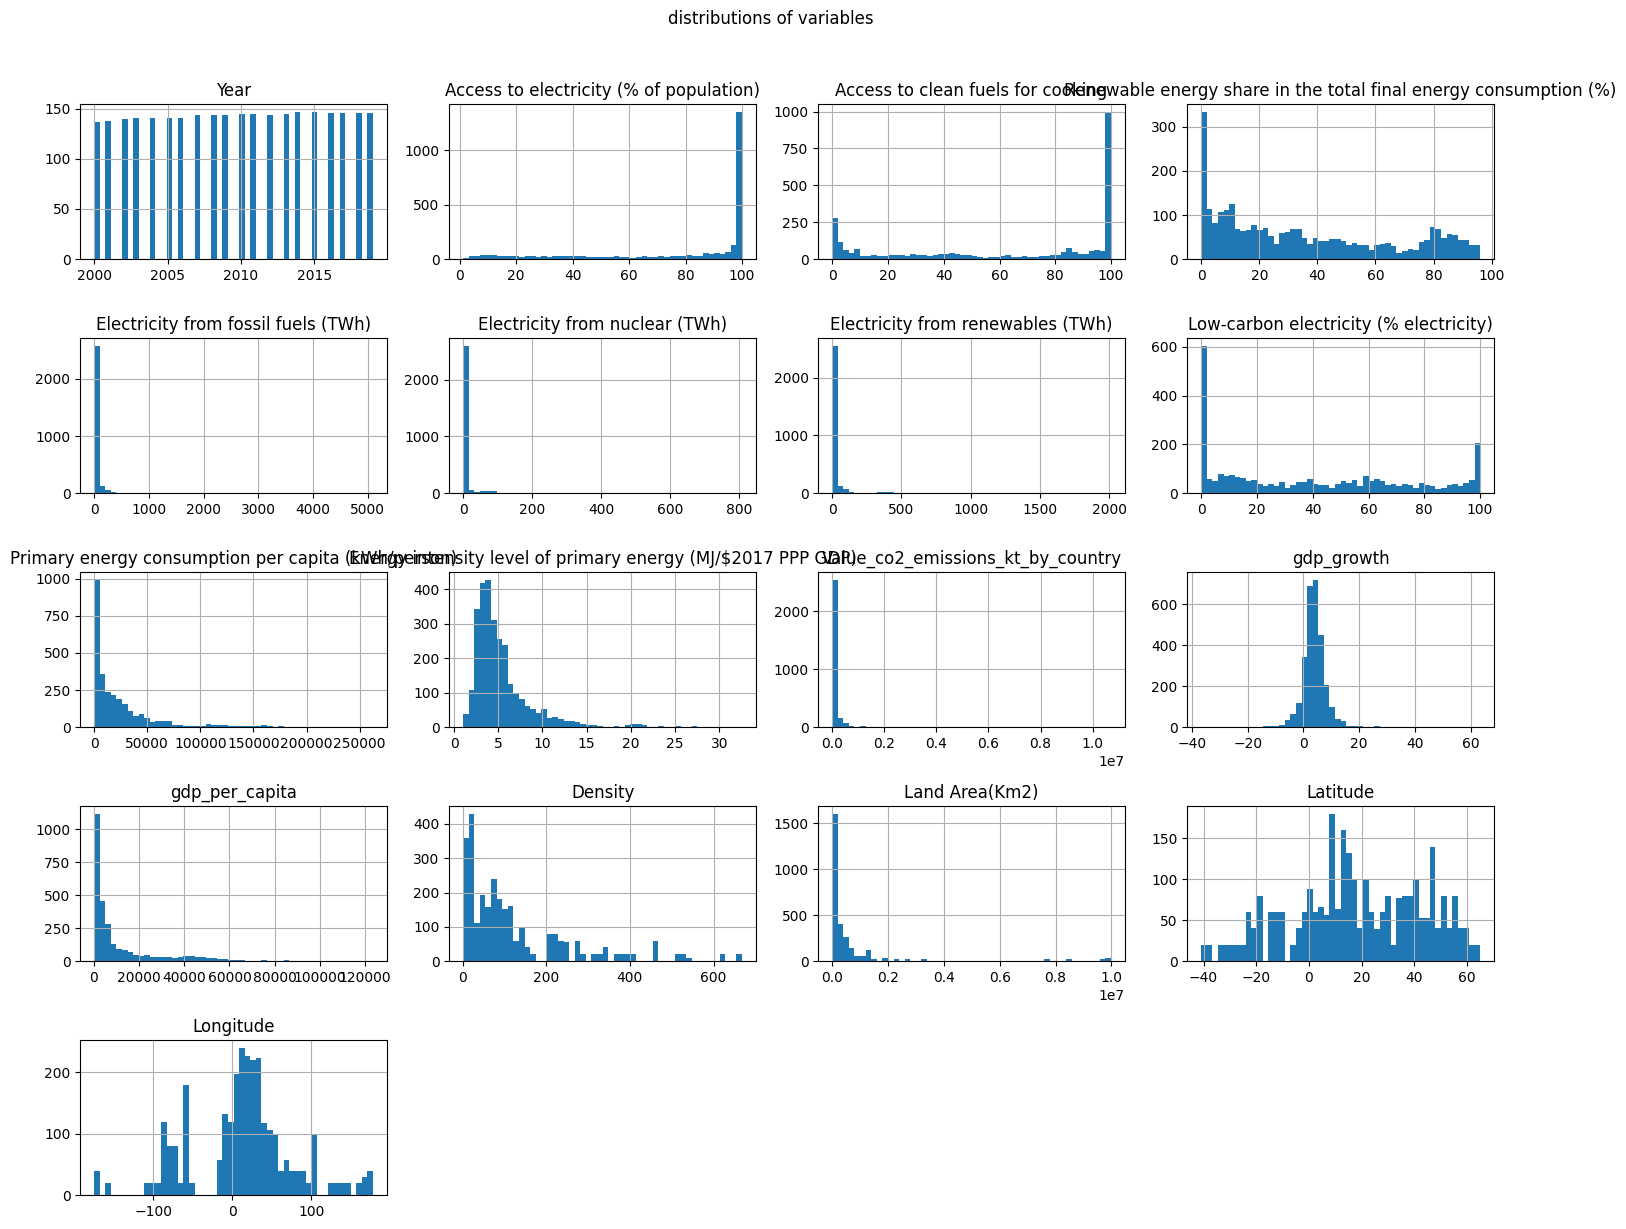

In [15]:
#features distribution of our variables
df1.hist(bins = 50,figsize=(15,12))
plt.suptitle('distributions of variables',x=0.5,y=1.02,ha='center',fontsize='large')
plt.tight_layout()
plt.show()

In [16]:
def show(columns,figsize):
    df1[columns].boxplot(figsize=figsize)
    plt.suptitle('Boxplot',x=0.5,y=1.02,ha='center',fontsize='large')
    #plt.tight_layout()
    plt.show()

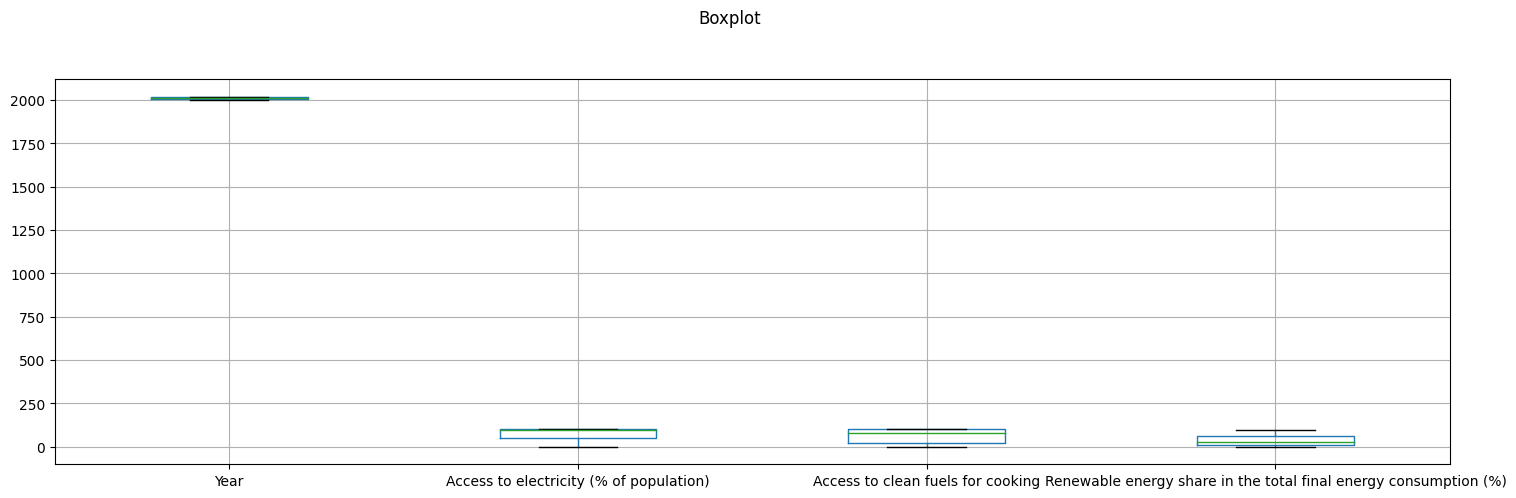

In [17]:
show(df1.columns[:4],(18,5))

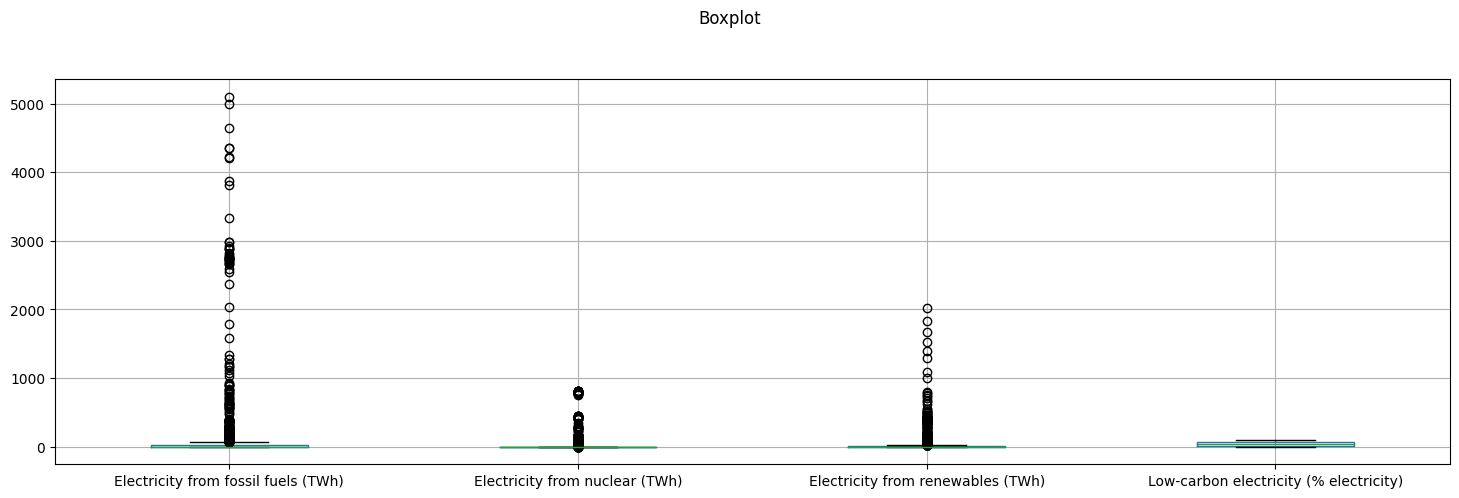

In [18]:
show(df1.columns[4:8],(18,5))

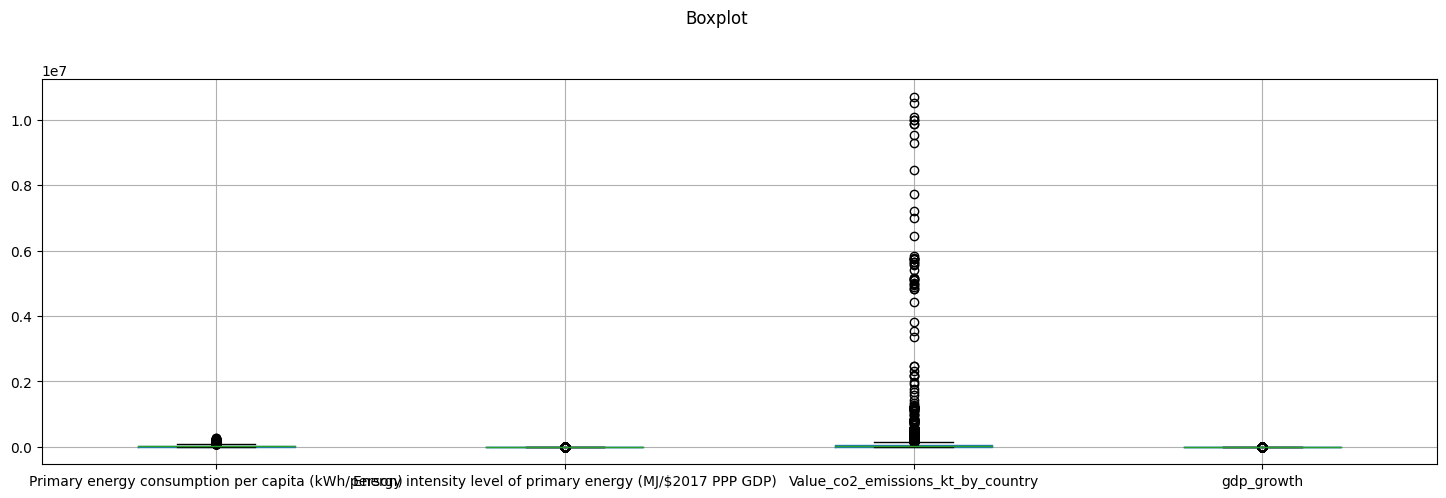

In [19]:
show(df1.columns[8:12],(18,5))

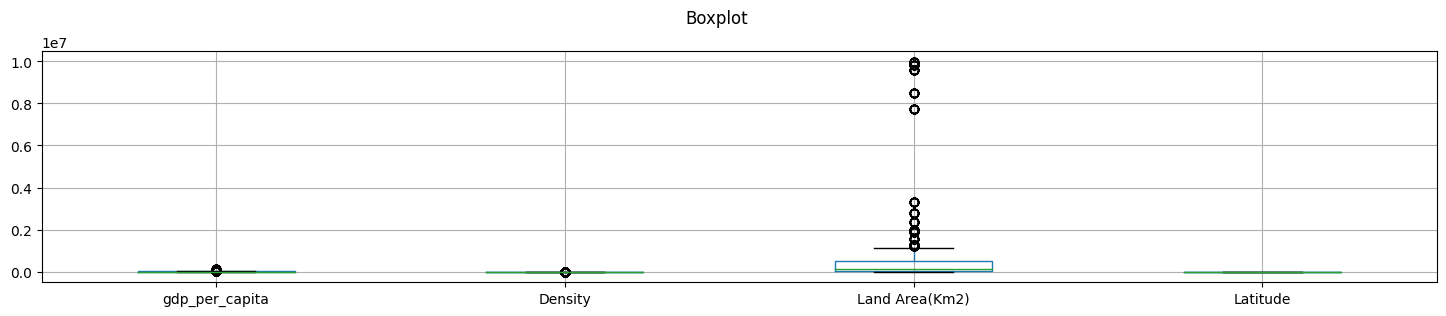

In [20]:
show(df1.columns[12:16],(18,3))

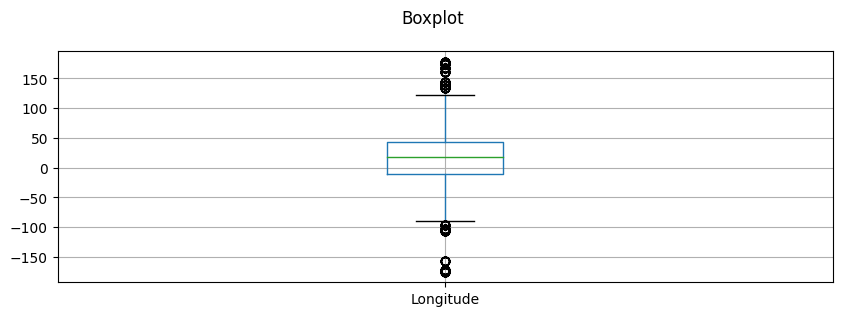

In [21]:
show(df1.columns[16:],(10,3))

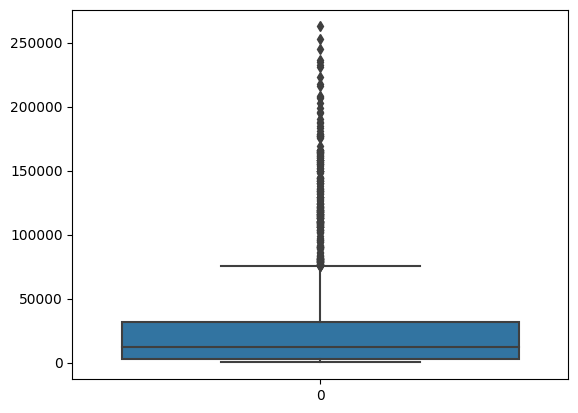

In [22]:
sns.boxplot(data = df1[df1.columns[8]])
plt.show()

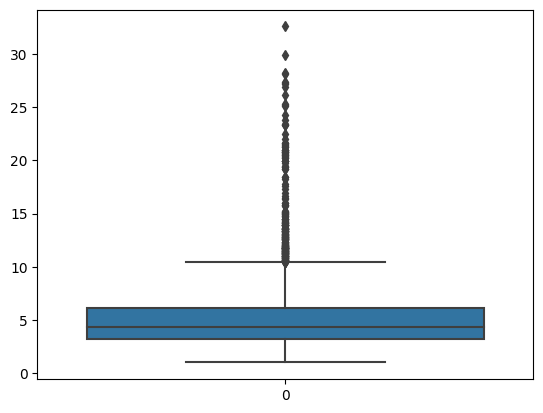

In [23]:
sns.boxplot(data = df1[df1.columns[9]])
plt.show()

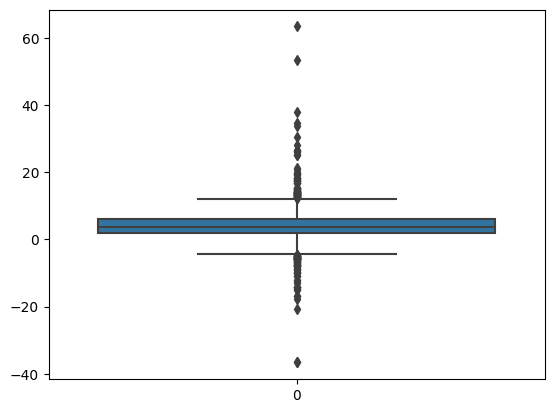

In [24]:
sns.boxplot(data = df1[df1.columns[11]])
plt.show()

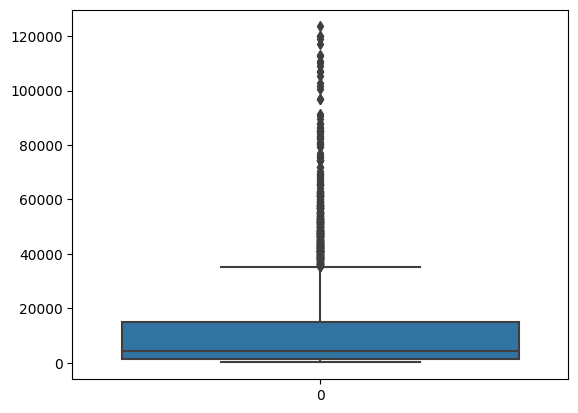

In [25]:
sns.boxplot(data = df1[df1.columns[12]])
plt.show()

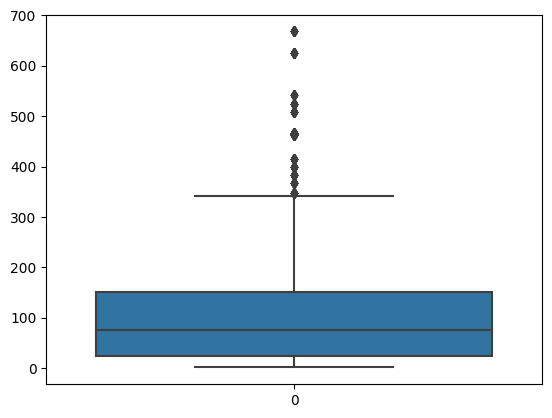

In [26]:
sns.boxplot(data = df1[df1.columns[13]])
plt.show()

In [27]:
topics = df.groupby('Entity',observed=True)['Value_co2_emissions_kt_by_country'].sum().to_frame()[:30]

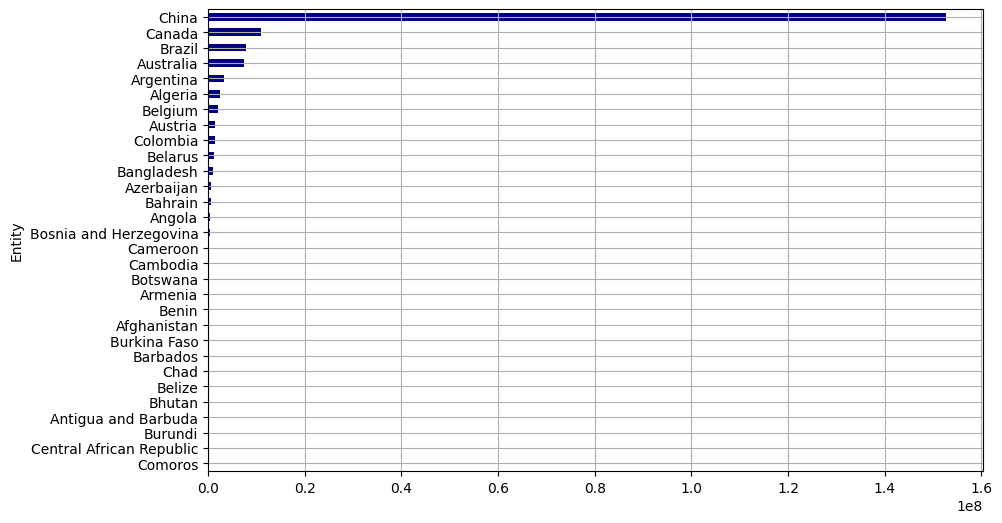

In [28]:
#visualisons les 30 pays les plus emeteurs de co2 dans le monde
topics = df.groupby('Entity',observed=True)['Value_co2_emissions_kt_by_country'].sum().to_frame()[:30]
topics.sort_values(by='Value_co2_emissions_kt_by_country',ascending=True).plot(kind='barh',colormap='jet',legend=False,figsize=(10,6))
plt.grid(True)
plt.show()

# Bivariate Statistics

In [29]:
#correlation in our dataset
corr = df1.corr()
corr

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.127846,0.059534,-0.028932,0.029695,-0.007866,0.072740,0.020253,0.004955,-0.154212,0.020553,-0.104554,0.133211,0.004087,-0.005145,0.000110,0.009334
Access to electricity (% of population),0.127846,1.000000,0.873346,-0.784041,0.134122,0.141985,0.158707,-0.159906,0.463193,-0.261321,0.133546,-0.106350,0.443714,0.059883,0.077406,0.449867,-0.133779
Access to clean fuels for cooking,0.059534,0.873346,1.000000,-0.794656,0.101704,0.172232,0.135423,-0.136655,0.561424,-0.194590,0.093662,-0.149866,0.554457,0.017739,0.082761,0.453261,-0.126025
Renewable energy share in the total final energy consumption (%),-0.028932,-0.784041,-0.794656,1.000000,-0.153083,-0.159468,-0.094132,0.474051,-0.438326,0.238766,-0.144988,0.085547,-0.369993,-0.088635,-0.067660,-0.349024,0.044408
Electricity from fossil fuels (TWh),0.029695,0.134122,0.101704,-0.153083,1.000000,0.644911,0.840460,-0.076464,0.105615,0.031369,0.989846,0.021873,0.131331,0.047997,0.636273,0.118993,0.039014
Electricity from nuclear (TWh),-0.007866,0.141985,0.172232,-0.159468,0.644911,1.000000,0.484125,0.062260,0.183278,-0.014443,0.597728,-0.070091,0.265571,-0.005950,0.470568,0.184573,-0.095510
Electricity from renewables (TWh),0.072740,0.158707,0.135423,-0.094132,0.840460,0.484125,1.000000,0.083562,0.130822,0.007493,0.857375,-0.001884,0.171251,-0.017494,0.732365,0.123903,-0.024848
Low-carbon electricity (% electricity),0.020253,-0.159906,-0.136655,0.474051,-0.076464,0.062260,0.083562,1.000000,-0.125828,0.055379,-0.060200,-0.026760,0.027079,-0.165220,0.044976,-0.071617,-0.055684
Primary energy consumption per capita (kWh/person),0.004955,0.463193,0.561424,-0.438326,0.105615,0.183278,0.130822,-0.125828,1.000000,0.138585,0.095448,-0.043154,0.711630,0.001348,0.116577,0.348802,0.048921
Energy intensity level of primary energy (MJ/$2017 PPP GDP),-0.154212,-0.261321,-0.194590,0.238766,0.031369,-0.014443,0.007493,0.055379,0.138585,1.000000,0.044390,0.113404,-0.163810,-0.092977,0.063227,-0.012146,0.120148


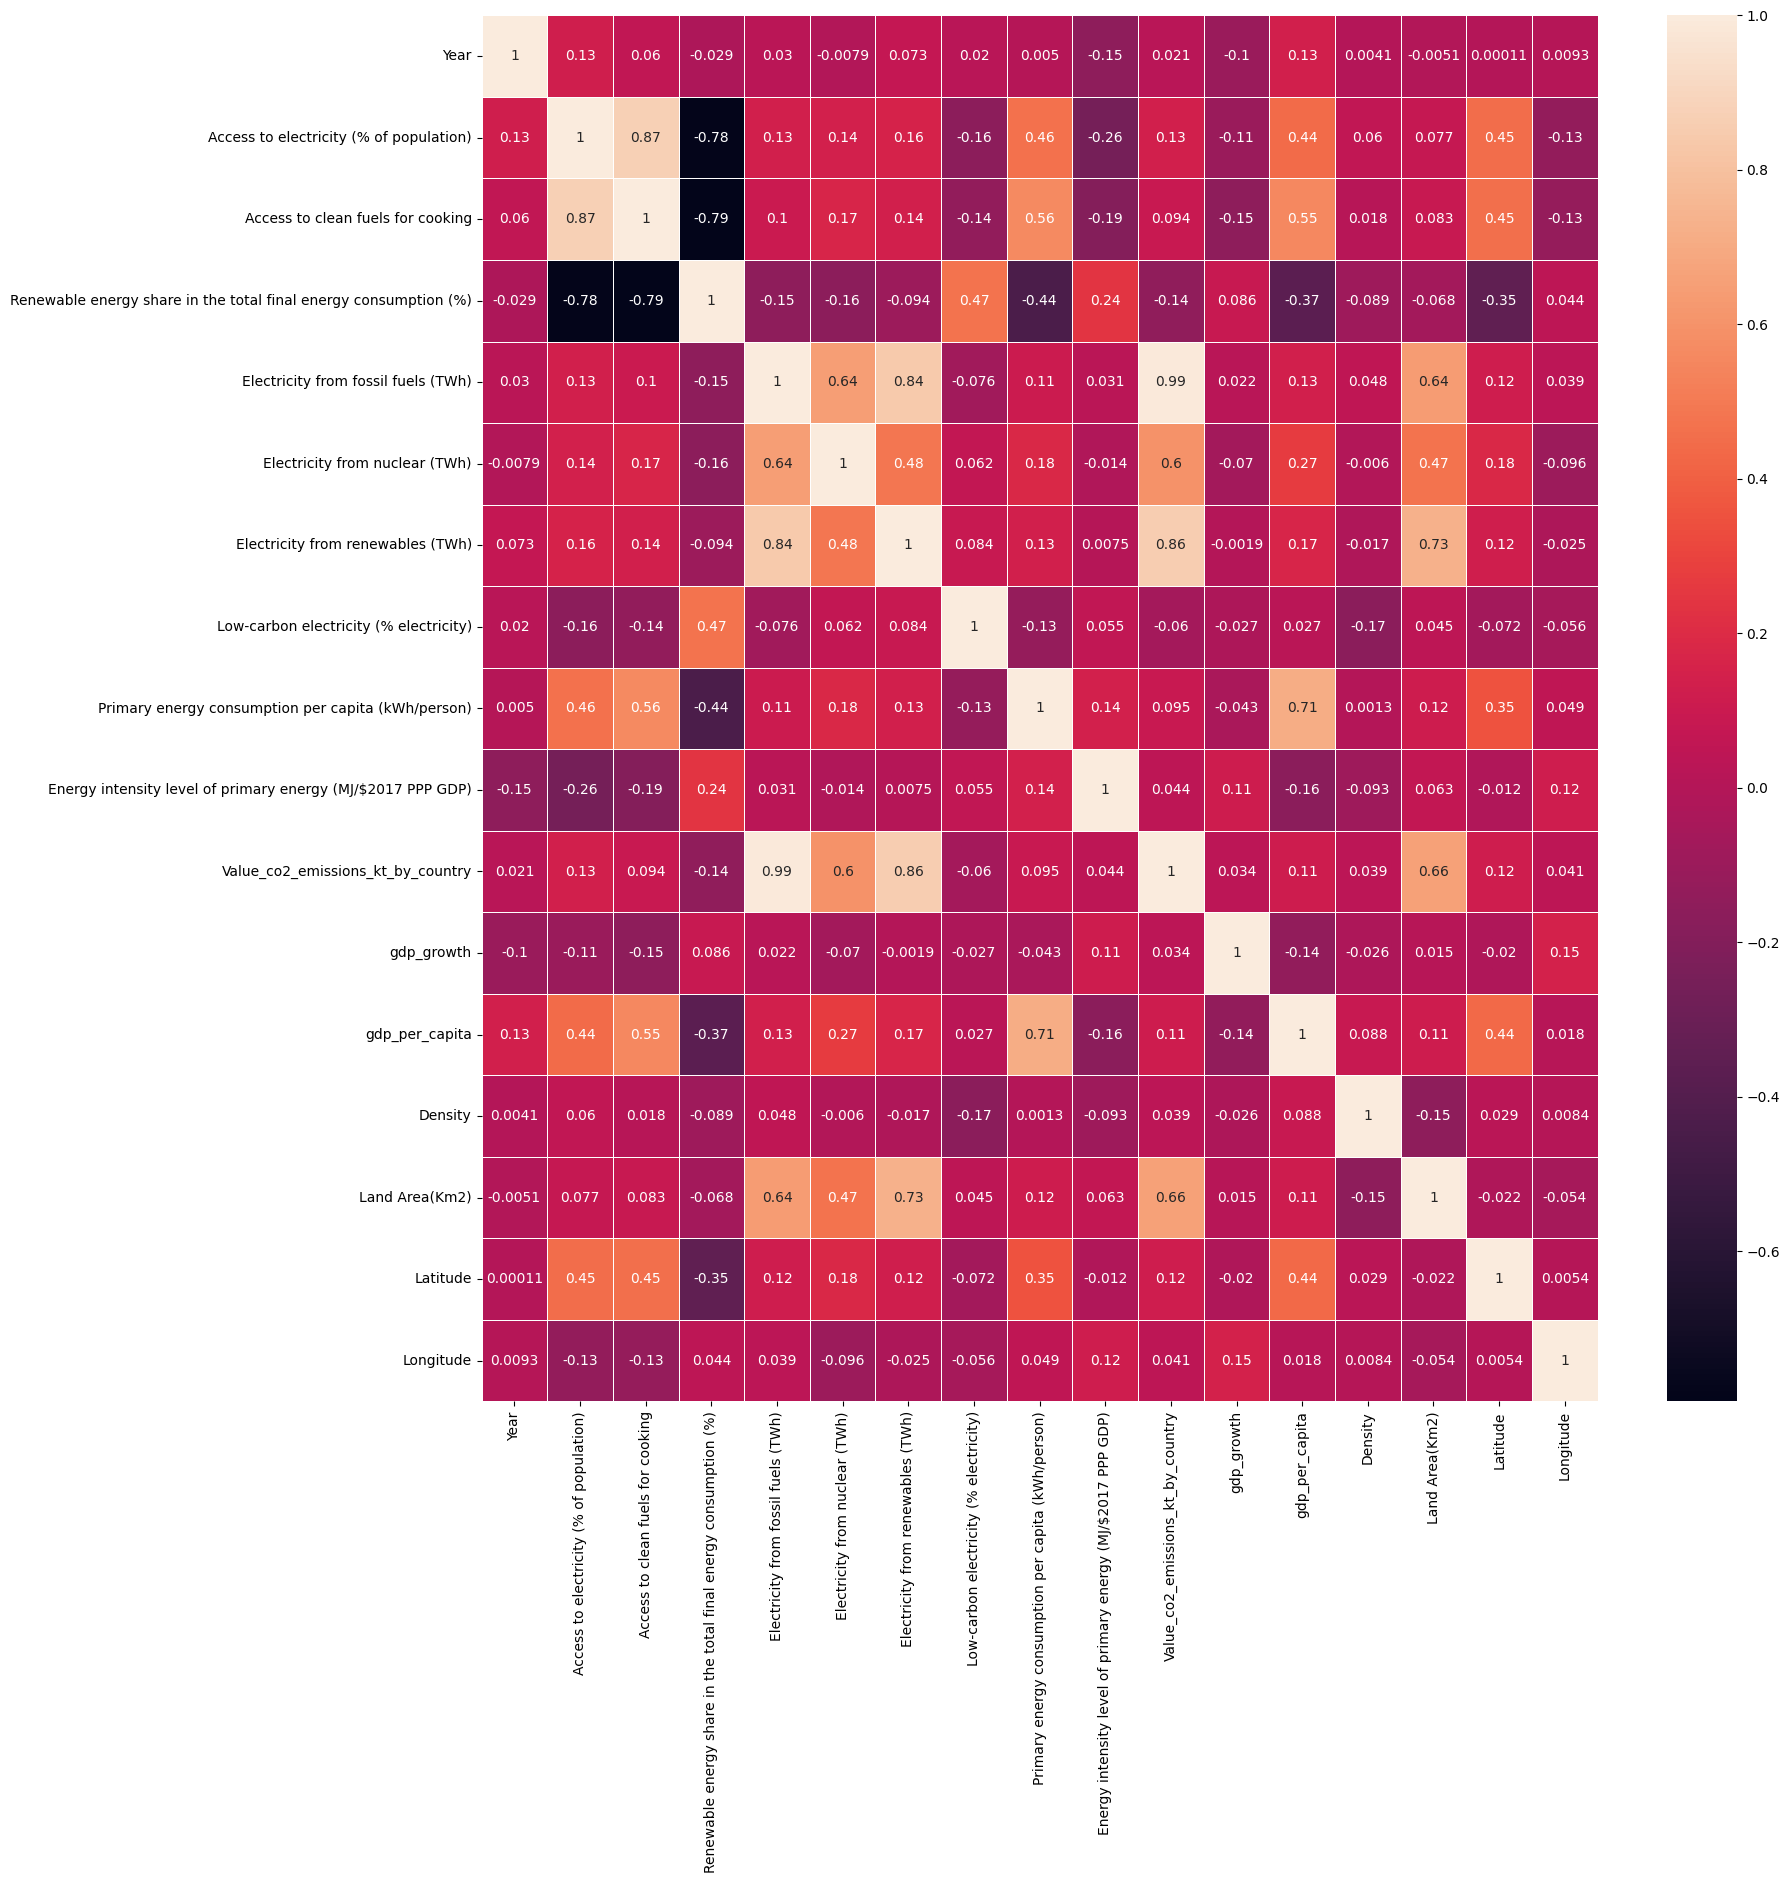

In [48]:
#we create a heatmap to visualize the dependencies between features
plt.figure(figsize=(18,18))
sns.heatmap(df1.corr(), annot=True ,linecolor='white',linewidths=0.4)
plt.show()